In [2]:
import serial
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ser = serial.Serial('/dev/ttyUSB0', 9600, timeout = 2, parity=serial.PARITY_NONE, bytesize=8,  stopbits=1, xonxoff=0, )  # open serial port

ser.write(':SENS:FUNC:CONC OFF \r'.encode()) # Desligua as funções simultâneas
ser.write(':SOUR:FUNC VOLT \r'.encode()) # Função fonte de volts
ser.write(':SENS:FUNC "CURR:DC" \r'.encode()) # Função, medida de corrrente
ser.write(':SENS:CURR:PROT 0.04 \r'.encode()) # Corrente proteção 40mA
ser.write(':SOUR:VOLT:START -5 \r'.encode()) # Voltagem começa -5V
ser.write(':SOUR:VOLT:STOP 5 \r'.encode()) # Voltagem termina 5V
ser.write(':SOUR:VOLT:STEP 2E-2 \r'.encode()) # paso de voltagem 0.02V
ser.write(':SOUR:VOLT:MODE SWE \r'.encode()) #  Modo de varredura em volts
ser.write(':SOUR:SWE:RANG AUTO \r'.encode()) # Variação automática de fonte.
ser.write(':SOUR:SWE:SPAC LIN \r'.encode()) # Varredura em escada linear
ser.write(':TRIG:COUN 501 \r'.encode()) # Numero de pontos de varredura.
ser.write(':SOUR:DEL 0.01 \r'.encode()) # atraso da fonte de 100 ms
ser.write(':OUTP ON \r'.encode()) # Ativar a saída da fonte
ser.write(':READ? \r'.encode()) # Ativar varredura, solicitar dados


Corrente = ser.readlines()
print(Corrente)

    
ser.write(':OUTP OFF \r'.encode()) # Desligar a saida

ser.close()

[b'-5.000000E+00,-3.999992E-02,+9.910000E+37,+1.563580E+03,+2.151600E+04,-4.980000E+00,-4.000007E-02,+9.910000E+37,+1.563649E+03,+2.151600E+04,-4.960000E+00,-4.000008E-02,+9.910000E+37,+1.563719E+03,+2.151600E+04,-4.940000E+00,-4.000004E-02,+9.910000E+37,+1.563789E+03,+2.151600E+04,-4.920000E+00,-4.000013E-02,+9.910000E+37,+1.563858E+03,+2.151600E+04,-4.900000E+00,-4.000004E-02,+9.910000E+37,+1.563929E+03,+2.151600E+04,-4.880000E+00,-4.000010E-02,+9.910000E+37,+1.564000E+03,+2.151600E+04,-4.860000E+00,-4.000005E-02,+9.910000E+37,+1.564070E+03,+2.151600E+04,-4.840000E+00,-4.000013E-02,+9.910000E+37,+1.564141E+03,+2.151600E+04,-4.820000E+00,-4.000008E-02,+9.910000E+37,+1.564210E+03,+2.151600E+04,-4.800000E+00,-4.000000E-02,+9.910000E+37,+1.564280E+03,+2.151600E+04,-4.780000E+00,-4.000007E-02,+9.910000E+37,+1.564350E+03,+2.151600E+04,-4.760000E+00,-4.000000E-02,+9.910000E+37,+1.564419E+03,+2.151600E+04,-4.740000E+00,-4.000005E-02,+9.910000E+37,+1.564489E+03,+2.151600E+04,-4.720000E+00,-4.

In [5]:
caminho = '/home/luis11/Documentos/Keithley/Comandos/Resistência_Cabos.txt'

with open(caminho, mode="w") as f:
    f.write('TensãovsCorrente\n')
    f.writelines(repr(Corrente))

In [7]:
a = np.genfromtxt('Resistência_Cabos.txt', delimiter=',', dtype= None)

a = np.reshape(a, (501, 5))
print(a)

[[-5.000000e+00 -3.999992e-02  9.910000e+37  1.563580e+03  2.151600e+04]
 [-4.980000e+00 -4.000007e-02  9.910000e+37  1.563649e+03  2.151600e+04]
 [-4.960000e+00 -4.000008e-02  9.910000e+37  1.563719e+03  2.151600e+04]
 ...
 [ 4.960000e+00  4.000182e-02  9.910000e+37  1.598657e+03  2.151600e+04]
 [ 4.980000e+00  4.000175e-02  9.910000e+37  1.598728e+03  2.151600e+04]
 [ 5.000000e+00  4.000183e-02  9.910000e+37  1.598799e+03  2.151600e+04]]


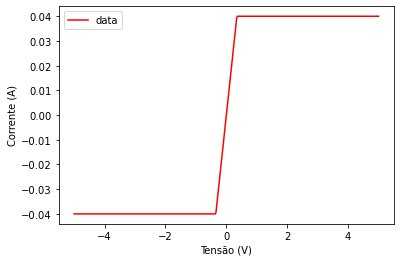

In [8]:
x= a[:,0]
y= a[:,1]

# Plot:
plt.figure(1)
plt.plot(x, y, color='r', label='data')
plt.xlabel('Tensão (V)')
plt.ylabel('Corrente (A)')
plt.legend()
plt.show()

In [9]:
np.savetxt('Corrente06', y, delimiter=',', )

In [10]:
np.savetxt('Tensão06', x, delimiter= ',')